In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.svm import SVC
from sklearn import linear_model
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./Data Sets/heart.csv')

In [3]:
df.shape

(918, 12)

In [4]:
df.head()
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

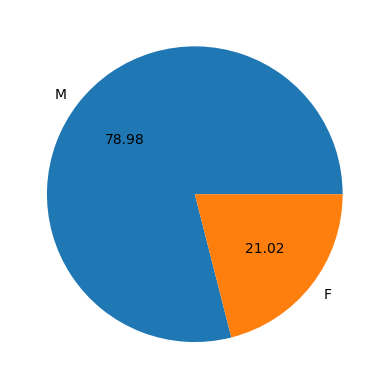

In [5]:
plt.pie(df['Sex'].value_counts(), labels = ['M', 'F'], autopct = '%0.2f')
plt.show()

In [6]:
oe = OrdinalEncoder()
sex = OrdinalEncoder(categories=[['F', 'M']])
df['Sex'] = oe.fit_transform(df[['Sex']])
# sex_e = sex.fit_transform(df[['Sex']])
sex

OrdinalEncoder(categories=[['F', 'M']])

### MALE = 1
### FEMALE = 0

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0.0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1.0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0.0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1.0,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df['ExerciseAngina'] = oe.fit_transform(df[['ExerciseAngina']])
ExerciseAngina = OrdinalEncoder(categories=[['N', 'Y']])
df.tail()
# 0 = N
# 1 = Y

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1.0,TA,110,264,0,Normal,132,0.0,1.2,Flat,1
914,68,1.0,ASY,144,193,1,Normal,141,0.0,3.4,Flat,1
915,57,1.0,ASY,130,131,0,Normal,115,1.0,1.2,Flat,1
916,57,0.0,ATA,130,236,0,LVH,174,0.0,0.0,Flat,1
917,38,1.0,NAP,138,175,0,Normal,173,0.0,0.0,Up,0


In [9]:
df['RestingECG'] = oe.fit_transform(df[['RestingECG']])
df['ST_Slope'] = oe.fit_transform(df[['ST_Slope']])
RestingECG = OrdinalEncoder(categories=[['LVH', 'Normal', 'ST']])
ST_Slope = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])
df.tail()
#   RestingECG  
# 0 = LVH
# 1 = NORMAL
# 2 = ST
#   ST_Slope
# 0 = DOWN
# 1 = FLAT
# 2 = UP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1.0,TA,110,264,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,ASY,144,193,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,ASY,130,131,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,ATA,130,236,0,0.0,174,0.0,0.0,1.0,1
917,38,1.0,NAP,138,175,0,1.0,173,0.0,0.0,2.0,0


In [10]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [11]:
df['ChestPainType'] = oe.fit_transform(df[['ChestPainType']])
ChestPain = OrdinalEncoder(categories=[['ASY', 'ATA', 'NAP', 'TA']])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [12]:
df['ChestPainType'].unique()

array([1., 2., 0., 3.])

#### ASY = 0
#### ATA = 1
#### NAP = 2
#### TA = 3

In [13]:
df.features = df.drop('HeartDisease', axis = 1)

C:\Users\Abhisek\AppData\Local\Temp\ipykernel_18344\1250275141.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.features = df.drop('HeartDisease', axis = 1)


In [14]:
target = df['HeartDisease']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.features, target, test_size=0.2)

In [16]:
print("X train", len(X_train))
print("X test:", len(X_test))
print("Y train:", len(y_train))
print("Y test:" ,len(y_test))

X train 734
X test: 184
Y train: 734
Y test: 184


In [17]:
lr = linear_model.LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, max_features=90, random_state=80, oob_score=True, n_jobs=-1, max_leaf_nodes=200)
svm = SVC(gamma=1)

In [18]:
dtc = DecisionTreeClassifier(max_features=200, max_leaf_nodes=2, max_depth=200)

In [19]:
cross_val_score(lr, X_train, y_train, cv = 10).mean()

C:\Users\Abhisek\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abhisek\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

0.8419104035542391

In [20]:
cross_val_score(rf, X_train, y_train, cv = 10).mean()

0.8432802665679378

In [21]:
cross_val_score(svm, X_train, y_train, cv = 10)

array([0.52702703, 0.52702703, 0.52702703, 0.54054054, 0.53424658,
       0.53424658, 0.53424658, 0.53424658, 0.53424658, 0.53424658])

In [22]:
cross_val_score(dtc, X_train, y_train, cv = 10)

array([0.77027027, 0.85135135, 0.82432432, 0.75675676, 0.87671233,
       0.79452055, 0.87671233, 0.78082192, 0.79452055, 0.75342466])

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=90, max_leaf_nodes=200, n_jobs=-1,
                       oob_score=True, random_state=80)

In [24]:
y_predicted = rf.predict(X_test)
print(y_predicted)

[0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1]


In [25]:
accuracy_score(y_test, y_predicted)

0.8858695652173914

In [26]:
average_precision_score(y_test, y_predicted)

0.8796822742474917

In [27]:
import pickle

In [28]:
# pickle.dump(rf, open('model.pkl', 'wb'))
# pickle.dump(X_test, open('train.pkl', 'wb'))
# pickle.dump(sex, open('sex.pkl', 'wb'))
# pickle.dump(ChestPain, open('model/chest.pkl', 'wb'))
# pickle.dump(RestingECG, open('model/ECG.pkl', 'wb'))
# pickle.dump(ST_Slope, open('model/slope.pkl', 'wb'))
# pickle.dump(ExerciseAngina, open('exercise.pkl', 'wb'))